In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load the data
data = {'EVE': {'my_mcc': {'COL2A1': 0.858,
                       'COL4A3': 0.808,
                       'COL4A5': 0.918,
                       'WFS1': 0.614,
                       'SLC26A4': 0.51,
                       'MYO7A': 0.523,
                       'FGFR1': 0.56,
                       'GJB2': 0.573},
        'tool_mcc': {'COL2A1': 0.846,
                       'COL4A3': 0.672,
                       'COL4A5': 0.916,
                       'WFS1': 0.676,
                       'SLC26A4': 0.523,
                       'MYO7A': 0.523,
                       'FGFR1': 0.604,
                       'GJB2': 0.526}},


        'AlphaMissense': {'my_mcc':{'COL2A1': 0.876,
                       'COL4A3': 0.811,
                       'COL4A5': 0.926,
                       'WFS1': 0.689,
                       'SLC26A4': 0.605,
                       'MYO7A': 0.561,
                       'FGFR1': 0.613,
                       'GJB2': 0.583},
             'tool_mcc': {'COL2A1': 0.813,
                       'COL4A3': 0.735,
                       'COL4A5': 0.926,
                       'WFS1': 0.68,
                       'SLC26A4': 0.659,
                       'MYO7A': 0.459,
                       'FGFR1': 0.593,
                       'GJB2': 0.66}},


          'Mutpred2': {'my_mcc':{'COL2A1': 0.902,
                       'COL4A3': 0.862,
                       'COL4A5': 0.929,
                       'WFS1': 0.752,
                       'SLC26A4': 0.648,
                       'MYO7A': 0.613,
                       'FGFR1': 0.629,
                       'GJB2': 0.706},
             'tool_mcc': {'COL2A1': 0.784,
                       'COL4A3': 0.775,
                       'COL4A5': 0.948,
                       'WFS1': 0.716,
                       'SLC26A4': 0.648,
                       'MYO7A': 0.506,
                       'FGFR1': 0.431,
                       'GJB2': 0.701}},


          'REVEL': {'my_mcc':{'COL2A1': 0.898,
                       'COL4A3': 0.886,
                       'COL4A5': 0.941,
                       'WFS1': 0.802,
                       'MYO7A': 0.706,
                       'FGFR1': 0.69},
             'tool_mcc': {'COL2A1': 0.852,
                       'COL4A3': 0.859,
                       'COL4A5': 0.93,
                       'WFS1': 0.888,
                       'MYO7A': 0.695,
                       'FGFR1': 0.81}},


              'VEST4': {'my_mcc':{'COL2A1': 0.909,
                       'COL4A3': 0.882,
                       'COL4A5': 0.939,
                       'SLC26A4': 0.654,
                       'MYO7A': 0.614,
                       'FGFR1': 0.657,
                       'GJB2': 0.688},
             'tool_mcc': {'COL2A1': 0.898,
                       'COL4A3': 0.815,
                       'COL4A5': 0.957,
                       'SLC26A4': 0.901,
                       'MYO7A': 0.574,
                       'FGFR1': 0.731,
                       'GJB2': 0.825}}}

# To add another tool:
# 'tool_name': {'my_mcc':{'COL2A1':
#                        'COL4A3':
#                        'COL4A5':
#                        'WFS1':
#                        'SLC26A4':
#                        'MYO7A':
#                        'FGFR1':
#                        'GJB2': },
#              '{tool}_mcc': {'COL2A1':
#                        'COL4A3':
#                        'COL4A5':
#                        'SLC26A4':
#                        'MYO7A':
#                        'FGFR1':
#                        'GJB2': }}

In [3]:
# Define colors for each algorithm
algorithm_colors = {'EVE': 'purple', 'AlphaMissense': 'r', 'REVEL': 'g', 'VEST4': 'pink', 'Mutpred2': 'y' }

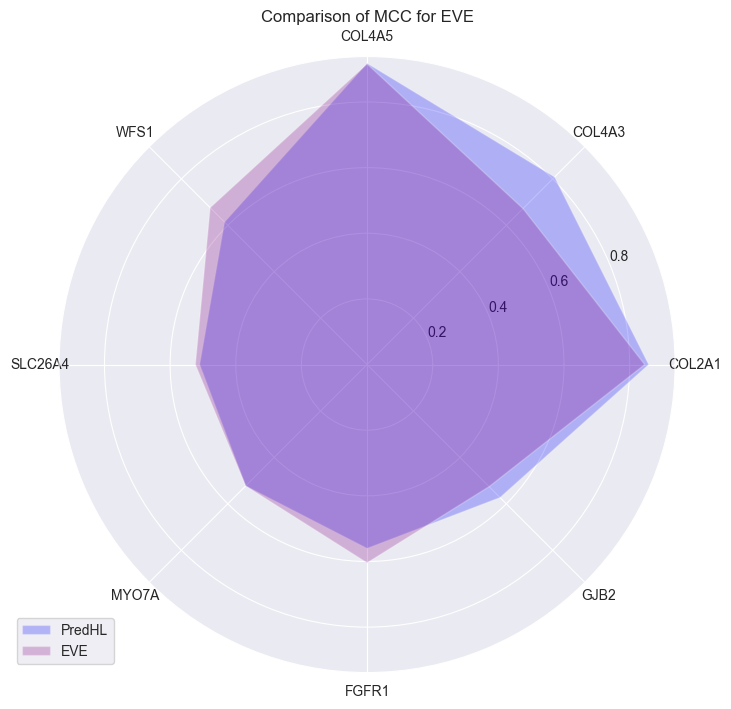

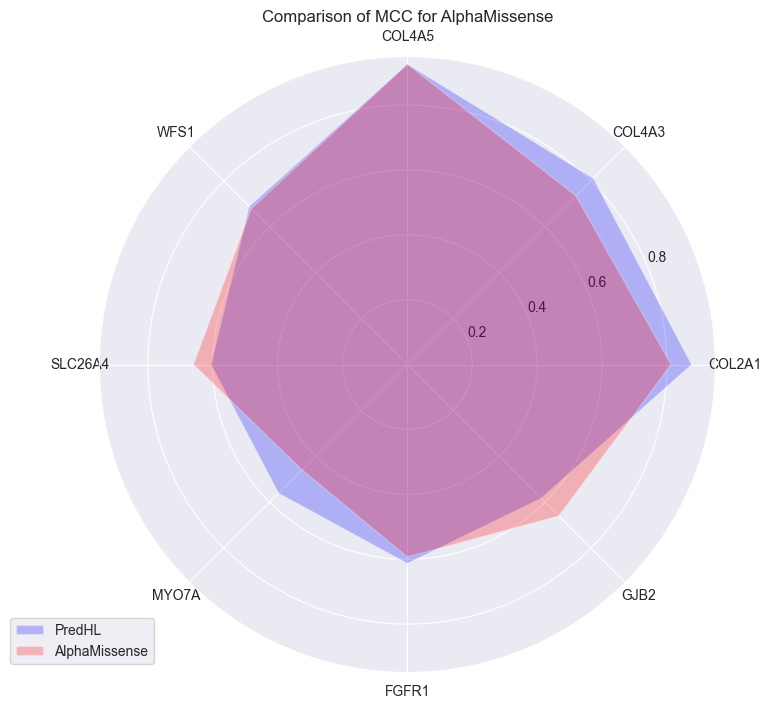

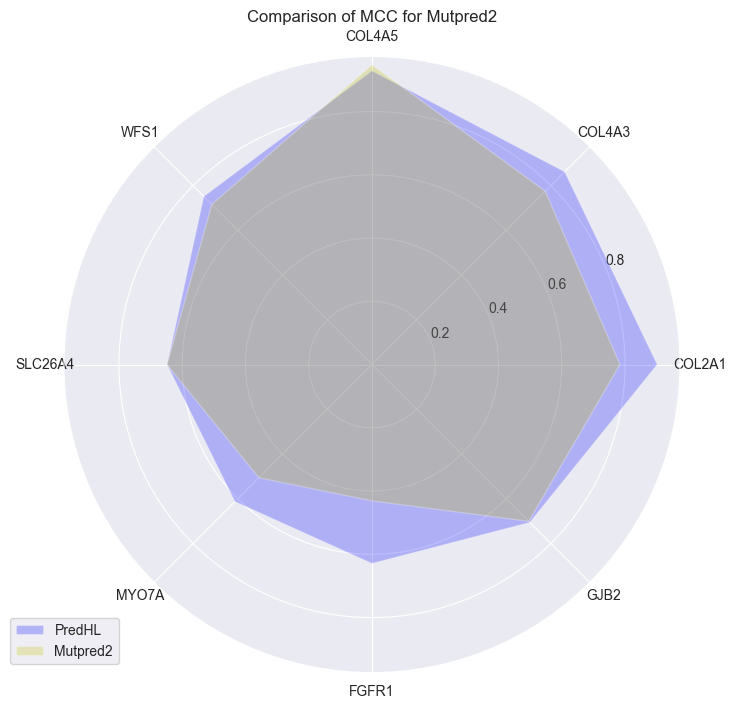

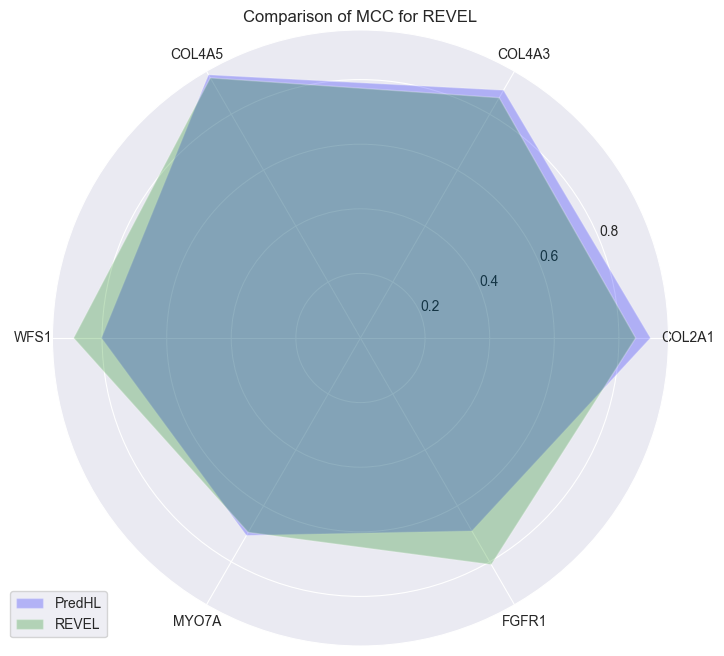

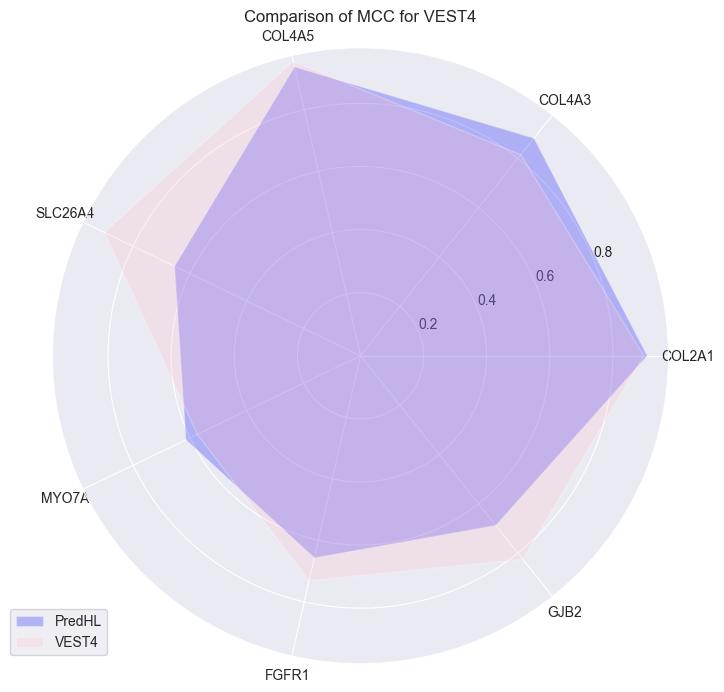

In [4]:
# Loop through the keys in the data dictionary
for algorithm, metrics_dict in data.items():
    genes = list(metrics_dict['my_mcc'].keys())

    # Create a DataFrame
    df = pd.DataFrame({
        'Gene': genes,
        'my_mcc': list(metrics_dict['my_mcc'].values()),
        'tool_mcc': list(metrics_dict['tool_mcc'].values())
    })

    # Set up the radar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    theta = np.linspace(0, 2 * np.pi, len(genes), endpoint=False)

    # Plot data for Algorithm 1
    ax.fill(theta, df['my_mcc'], 'b', alpha=0.25, label='PredHL')
    ax.set_xticks(theta)
    ax.set_xticklabels(df['Gene'])

    # Plot data for Algorithm 2
    ax.fill(theta, df['tool_mcc'], algorithm_colors[algorithm], alpha=0.25, label=f"{algorithm}")

    # Add legend and title
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title(f'Comparison of MCC for {algorithm}')

    # Show the plot
    plt.show()

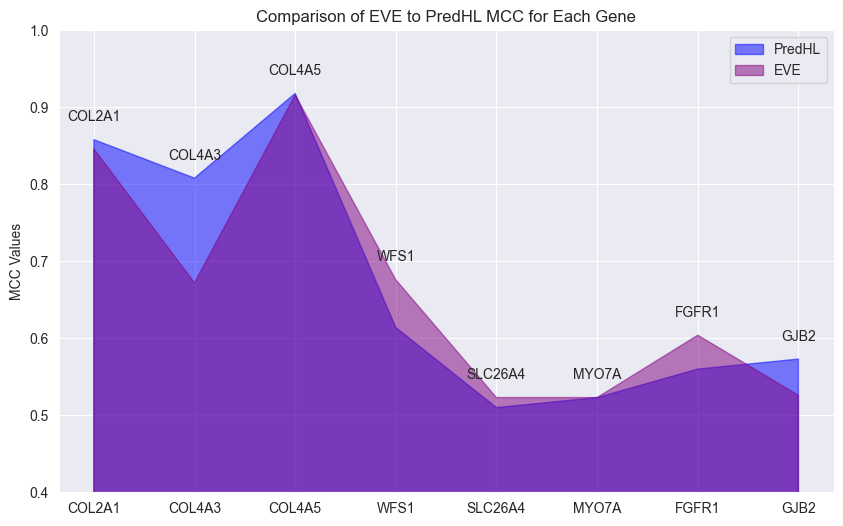

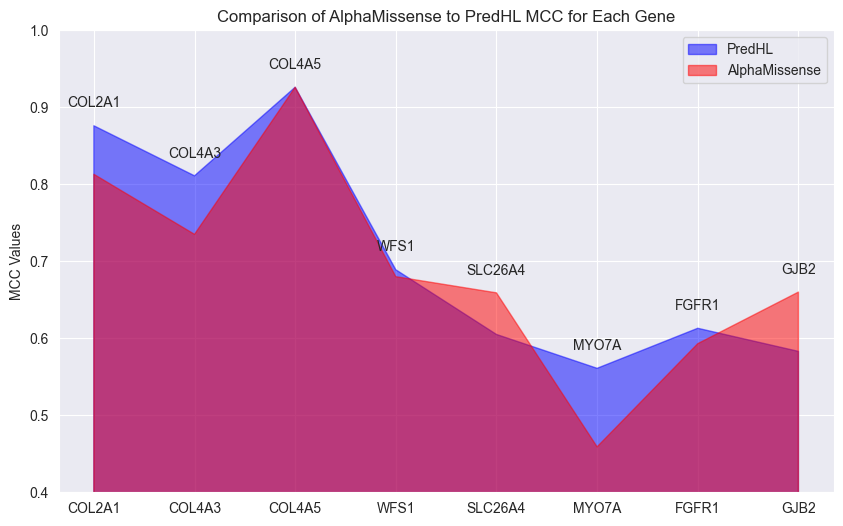

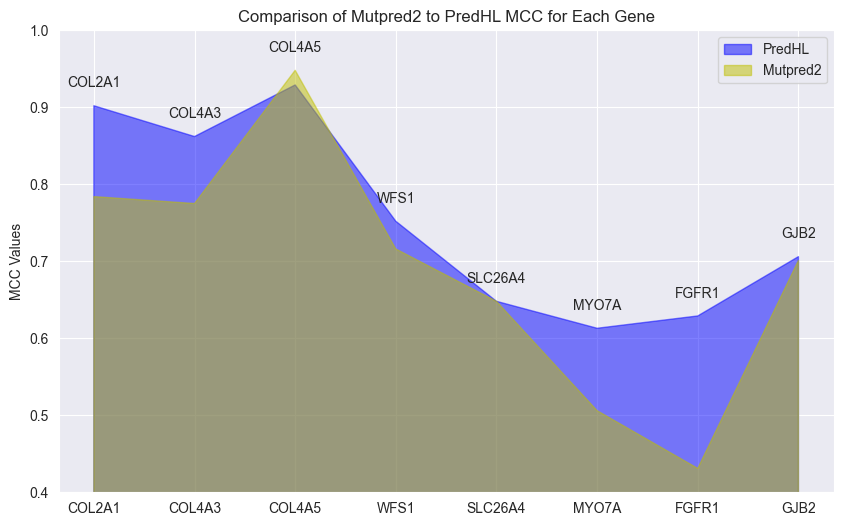

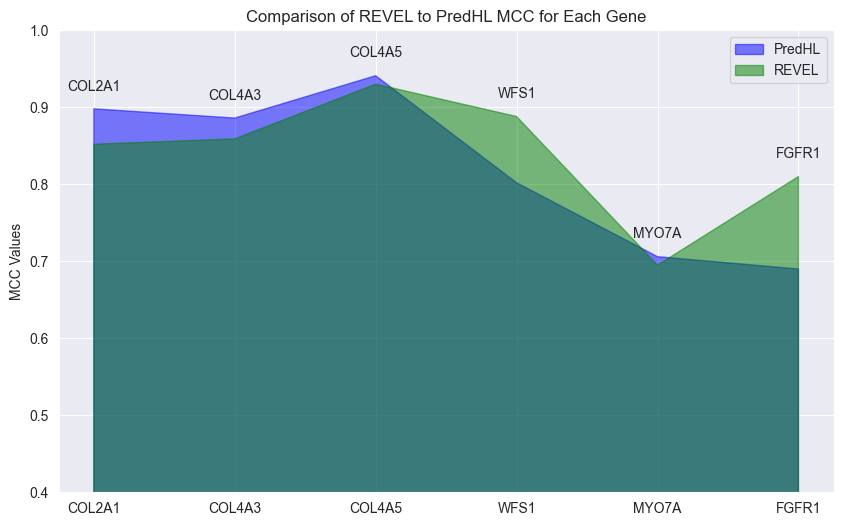

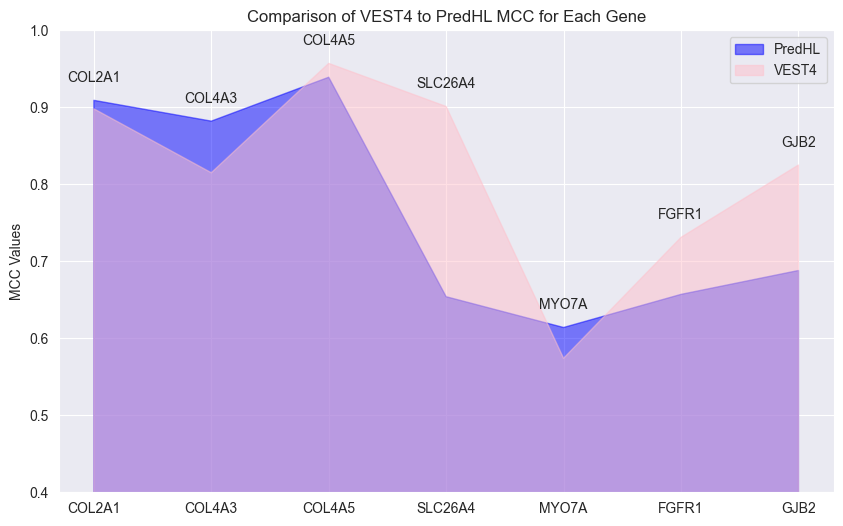

In [5]:

# Loop through the keys in the data dictionary
for algorithm, metrics_dict in data.items():
    genes = list(metrics_dict['my_mcc'].keys())

    # Extract MCC values for the given algorithm
    my_mcc = metrics_dict['my_mcc']
    tool_mcc = metrics_dict['tool_mcc']

    x = np.arange(len(genes))

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.fill_between(x, 0, list(my_mcc.values()), alpha=0.5, label='PredHL', color='blue')
    ax.fill_between(x, 0, list(tool_mcc.values()), alpha=0.5, label=f'{algorithm}', color= algorithm_colors[algorithm])

    ax.set_xticks(x)
    ax.set_xticklabels(genes)
    ax.legend()

    # Set y-axis limits
    ax.set_ylim(0.4, 1.0)

    plt.ylabel('MCC Values')
    plt.title(f'Comparison of {algorithm} to PredHL MCC for Each Gene')

    # Annotating the top of each "mountain"
    for i, gene in enumerate(genes):
        ax.annotate(gene, (i, max(list(my_mcc.values())[i], list(tool_mcc.values())[i]) + 0.02), ha='center', va='bottom')

    plt.show()

In [6]:
# eve_data = data[EVE]
# genes = eve_data[eve_mcc].keys

# # Create a DataFrame
# df = pd.DataFrame({'Gene': genes, 'EVE': data[EVE][eve_mcc], 'PredHL': my_mcc_EVE})

# # Set up the radar plot
# fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
# theta = np.linspace(0, 2 * np.pi, len(genes), endpoint=False)

# # Plot data for Algorithm 1
# ax.fill(theta, EVE_mcc, 'b', alpha=0.25, label='EVE')
# ax.set_xticks(theta)
# ax.set_xticklabels(genes)

# # Plot data for Algorithm 2
# ax.fill(theta, my_mcc_EVE, 'r', alpha=0.25, label='PredHL')

# # Add legend and title
# ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
# plt.title('Comparison of EVE and PredHL MCC')

# # Show the plot
# plt.show()


In [7]:
# x = np.arange(len(genes))

# fig, ax = plt.subplots(figsize=(10, 6))

# ax.fill_between(x, 0, EVE_mcc, alpha=0.5, label='EVE', color='red')
# ax.fill_between(x, 0, my_mcc_EVE, alpha=0.5, label='PredHL', color='blue')

# ax.set_xticks(x)
# ax.set_xticklabels(genes)
# ax.legend()

# # Set y-axis limits
# ax.set_ylim(0.4, 1.0)

# plt.ylabel('MCC Values')
# plt.title('Comparison of EVE to PredHL MCC for Each Gene')

# # Annotating the top of each "mountain"
# for i, gene in enumerate(genes):
#     ax.annotate(gene, (i, max(EVE_mcc[i], my_mcc_EVE[i]) + 0.02), ha='center', va='bottom')

# plt.show()

In [8]:
# # Data
# genes = ['COL2A1', 'COL4A3', 'COL4A5', 'WFS1', 'SLC26A4', 'MYO7A', 'FGFR1', 'GJB2']
# am_mcc = [0.792, 0.727, 0.92, 0.701, 0.659, 0.459, 0.577, 0.641]
# my_mcc_am = [0.855, 0.802, 0.921, 0.675, 0.607, 0.55, 0.606, 0.558]

# # Create a DataFrame
# df = pd.DataFrame({'Gene': genes, 'AlphaMissense': am_mcc, 'PredHL': my_mcc_am})

# # Set up the radar plot
# fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
# theta = np.linspace(0, 2 * np.pi, len(genes), endpoint=False)

# # Plot data for Algorithm 1
# ax.fill(theta, am_mcc, 'b', alpha=0.25, label='AlphaMissense')
# ax.set_xticks(theta)
# ax.set_xticklabels(genes)

# # Plot data for Algorithm 2
# ax.fill(theta, my_mcc_am, 'r', alpha=0.25, label='PredHL')

# # Add legend and title
# ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
# plt.title('Comparison of AlphaMissense and PredHL MCC')

# # Show the plot
# plt.show()

In [9]:
# x = np.arange(len(genes))

# fig, ax = plt.subplots(figsize=(10, 6))

# ax.fill_between(x, 0, am_mcc, alpha=0.5, label='AlphaMissense', color='red')
# ax.fill_between(x, 0, my_mcc_am, alpha=0.5, label='PredHL', color='blue')

# ax.set_xticks(x)
# ax.set_xticklabels(genes)
# ax.legend()

# # Set y-axis limits
# ax.set_ylim(0.4, 1.0)

# plt.ylabel('MCC Values')
# plt.title('Comparison of AlphaMissense to PredHL MCC for Each Gene')

# # Annotating the top of each "mountain"
# for i, gene in enumerate(genes):
#     ax.annotate(gene, (i, max(am_mcc[i], my_mcc_am[i]) + 0.02), ha='center', va='bottom')

# plt.show()

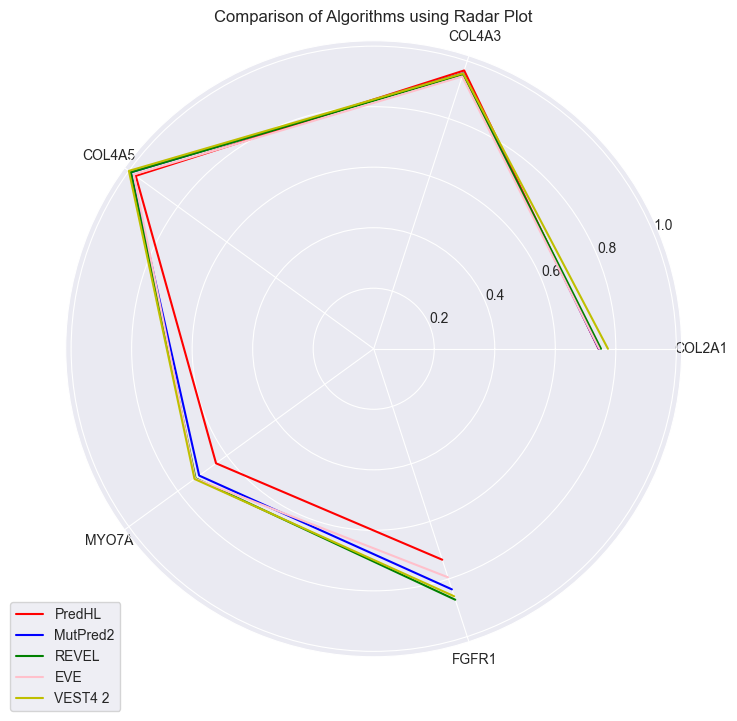

In [10]:
# Data
genes = ['COL2A1', 'COL4A3', 'COL4A5', 'MYO7A', 'FGFR1']
mutpred_mcc = [0.744, 0.957, 0.992, 0.713, 0.836]
vest_mcc = [0.774, 0.957, 1, 0.732, 0.86]
revel_mcc = [0.751, 0.953, 0.992, 0.728, 0.872]
eve_mcc = [0.745, 0.946, 0.98, 0.73, 0.794]
my_mcc = [0.743, 0.967, 0.972, 0.644, 0.733]

# Create a DataFrame
df = pd.DataFrame({'Gene': genes, 'MutPred2': mutpred_mcc, 'VEST4': vest_mcc,
                   'REVEL': revel_mcc, 'EVE': eve_mcc, 'PredHL': my_mcc})

# Set up the radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
theta = np.linspace(0, 2 * np.pi, len(genes), endpoint=False)

# Plot data for my_mcc
ax.plot(theta, my_mcc, 'r', label='PredHL')
ax.set_xticks(theta)
ax.set_xticklabels(genes)

# Plot data for MutPred
ax.plot(theta, mutpred_mcc, 'b', label='MutPred2')

# Plot data for revel
ax.plot(theta, revel_mcc, 'g', label='REVEL')

# Plot data for EVE
ax.plot(theta, eve_mcc, 'pink', label='EVE')

# Plot data for VEST4
ax.plot(theta, vest_mcc, 'y', label='VEST4 2')


# Add legend and title
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Comparison of Algorithms using Radar Plot')

# Show the plot
plt.show()

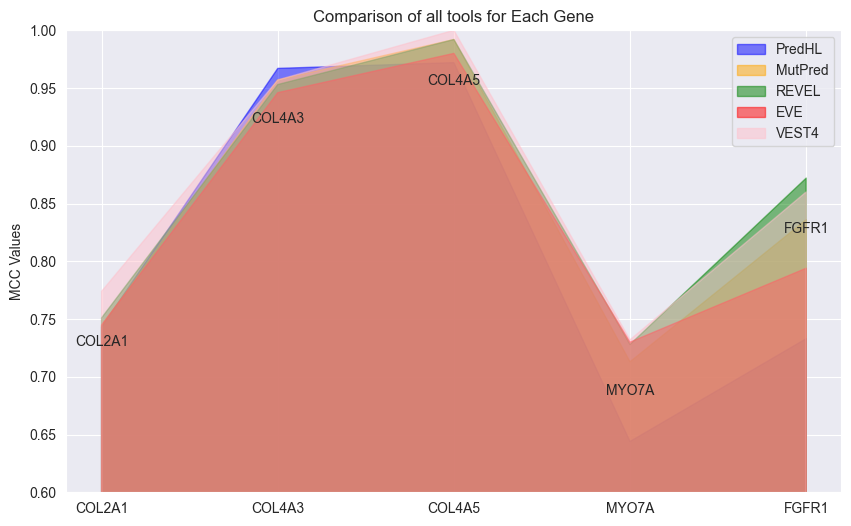

In [11]:
x = np.arange(len(genes))

fig, ax = plt.subplots(figsize=(10, 6))

ax.fill_between(x, 0, my_mcc, alpha=0.5, label='PredHL', color='blue')
ax.fill_between(x, 0, mutpred_mcc, alpha=0.5, label='MutPred', color='orange')
ax.fill_between(x, 0, revel_mcc, alpha=0.5, label='REVEL', color='green')
ax.fill_between(x, 0, eve_mcc, alpha=0.5, label='EVE', color='red')
ax.fill_between(x, 0, vest_mcc, alpha=0.5, label='VEST4', color='pink')

ax.set_xticks(x)
ax.set_xticklabels(genes)
ax.legend()

# Set y-axis limits
ax.set_ylim(0.6, 1.0)

plt.ylabel('MCC Values')
plt.title('Comparison of all tools for Each Gene')

# Annotating the top of each "mountain"
for i, gene in enumerate(genes):
    ax.annotate(gene, (i, max(mutpred_mcc[i], my_mcc[i], revel_mcc[i], eve_mcc[i], vest_mcc[i]) - 0.05), ha='center', va='bottom')

plt.show()

In [12]:
data = {'PredHL':{'COL2A1': ,
                  'COL4A3': ,
                  'COL4A5': ,
                  'MYO7A': ,
                  'FGFR1':},
        'EVE': {'COL2A1': ,
                       'COL4A3': ,
                       'COL4A5': ,
                       'MYO7A': ,
                       'FGFR1':},
        'REVEL': {'COL2A1': ,
                       'COL4A3': ,
                       'COL4A5': ,
                       'MYO7A': ,
                       'FGFR1':},
        'VEST4': {'COL2A1': ,
                       'COL4A3': ,
                       'COL4A5': ,
                       'MYO7A': ,
                       'FGFR1':},
        'AlphaMissense': {'COL2A1': ,
                       'COL4A3': ,
                       'COL4A5': ,
                       'MYO7A': ,
                       'FGFR1':}}

# Find the common set of genes across all tools
common_genes = set(['COL2A1', 'COL4A3', 'COL4A5', 'MYO7A', 'FGFR1'])
for algorithm, metrics_dict in data.items():
    common_genes = common_genes.intersection(metrics_dict['my_mcc'].keys())

# Loop through the keys in the data dictionary
x = np.arange(len(common_genes))

fig, ax = plt.subplots(figsize=(10, 6))

# Loop through algorithms and plot data
for algorithm, metrics_dict in data.items():
    algorithm_mcc = metrics_dict['my_mcc']
    other_algorithm_mcc = metrics_dict['tool_mcc']

    # Use colors based on the algorithm
    color = algorithm_colors[algorithm]

    ax.plot(x, list(algorithm_mcc.get(gene, 0) for gene in common_genes), label=f'{algorithm}', color=color)

ax.set_xticks(x)
ax.set_xticklabels(common_genes)
ax.legend(loc='upper center', fancybox=True, shadow=True, ncol=len(data))

# Set y-axis limits
ax.set_ylim(0.4, 1.0)

plt.ylabel('MCC Values')
plt.title('Comparison of all tools for Each Gene')

# Annotating the top of each "mountain"
for i, gene in enumerate(common_genes):
    mcc_values = [data[algorithm]['my_mcc'].get(gene, 0) for algorithm in data]
    ax.annotate(gene, (i, max(mcc_values) - 0.05), ha='center', va='bottom')

plt.show()

SyntaxError: invalid syntax (3676502477.py, line 1)